# Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\laxmi\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loading the dataset

In [14]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Cleaning The dataSet

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '')

In [18]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
df.dropna(subset = ['TotalCharges'], inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df.shape

(7032, 21)

In [24]:
df.pop('customerID')

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7032, dtype: object

In [25]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

# Analysing the Dataset

In [26]:
import seaborn as sns

Text(0.5, 1.0, 'Churn Feature')

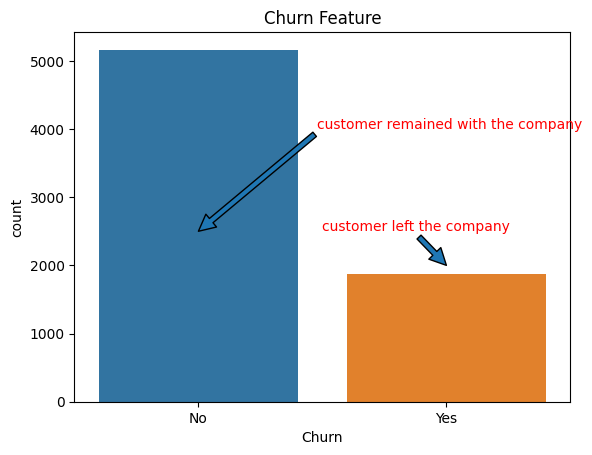

In [31]:
sns.countplot(data = df, x = "Churn")
plt.annotate('customer remained with the company', xytext=(0.48,4000), color='red', 
             xy=(0,2500), arrowprops={} )
plt.annotate('customer left the company', xytext=(0.5,2500), color='red', 
             xy=(1,2000), arrowprops={} )
plt.title("Churn Feature")

Text(0.5, 1.0, 'Churn Vs Contract')

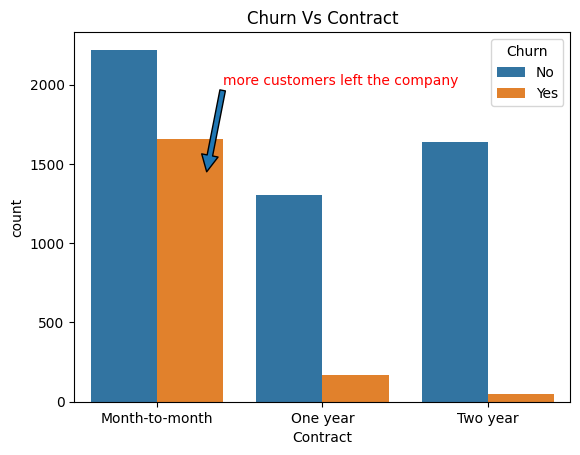

In [32]:
sns.countplot(data = df, x= "Contract", hue = "Churn")
plt.annotate('more customers left the company', xytext=(0.4,2000), color='red', 
             xy=(0.3,1450), arrowprops={} )
plt.title("Churn Vs Contract")

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

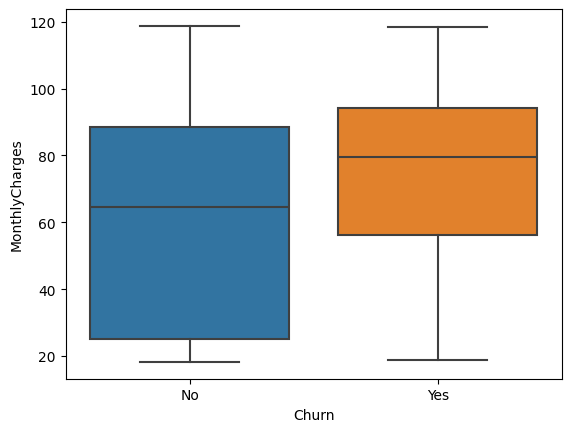

In [33]:
sns.boxplot(data = df, y= "MonthlyCharges", x= "Churn")

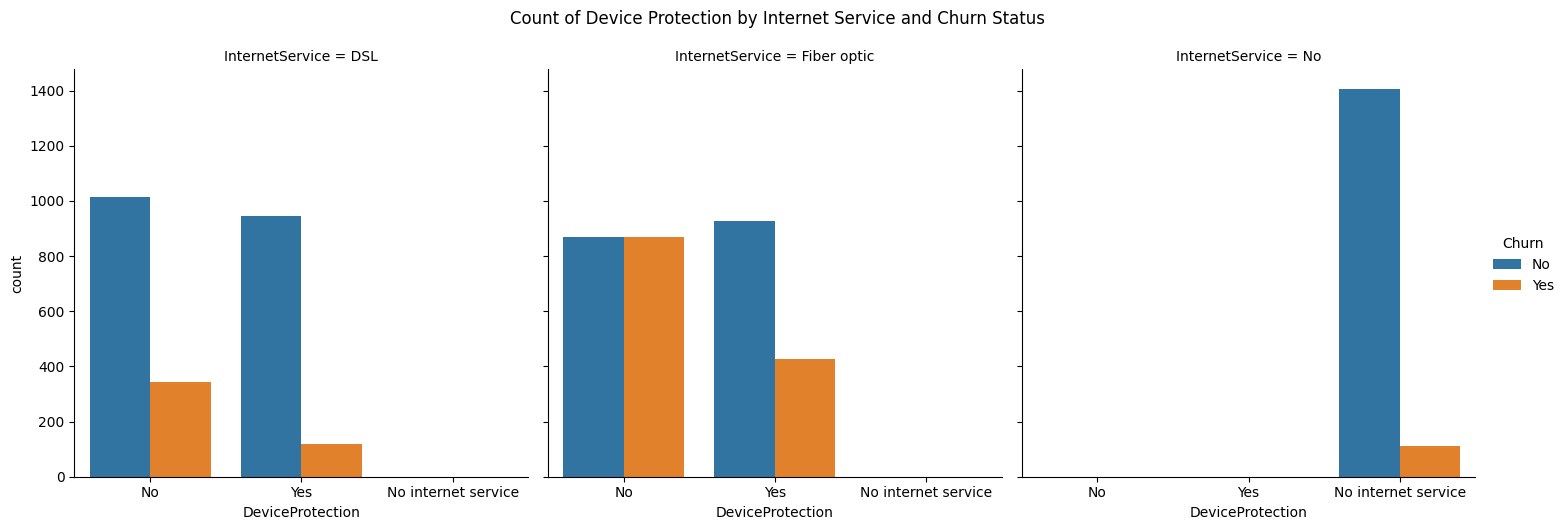

In [34]:
g = sns.catplot(data=df, x="DeviceProtection", hue="Churn", col="InternetService", kind="count")
g.fig.suptitle('Count of Device Protection by Internet Service and Churn Status', y=1.05)
plt.show()

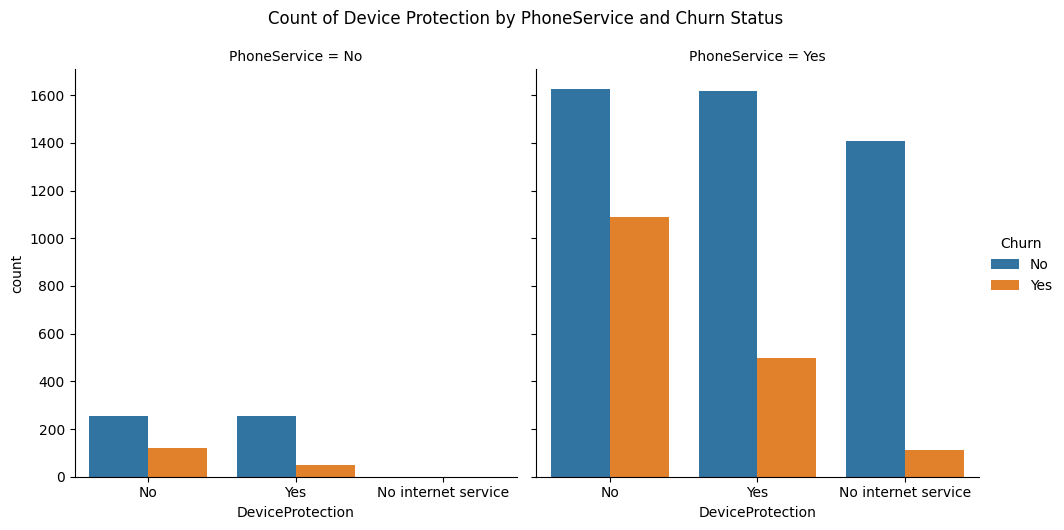

In [35]:
g = sns.catplot(data=df, x="DeviceProtection", hue="Churn", col="PhoneService", kind="count")
g.fig.suptitle('Count of Device Protection by PhoneService and Churn Status', y=1.05)
plt.show()

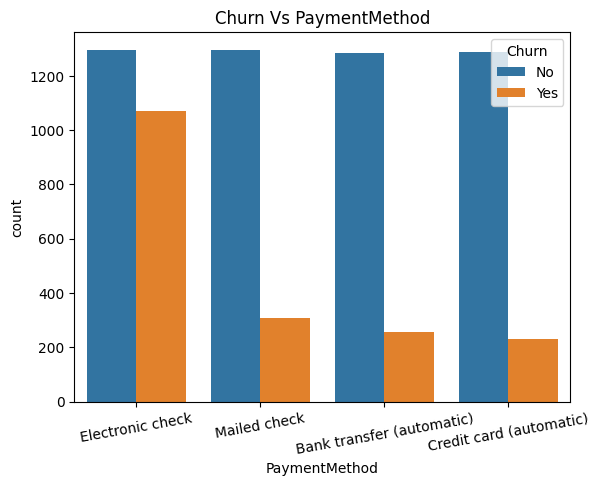

In [36]:
sns.countplot(data = df, x = "PaymentMethod", hue = "Churn")
plt.xticks(rotation=10)
plt.title("Churn Vs PaymentMethod")
plt.show()

**Note:** Whoever Choose the PaymentMethod is **ELECTRONIC CHECK**, these custemers are left the company.

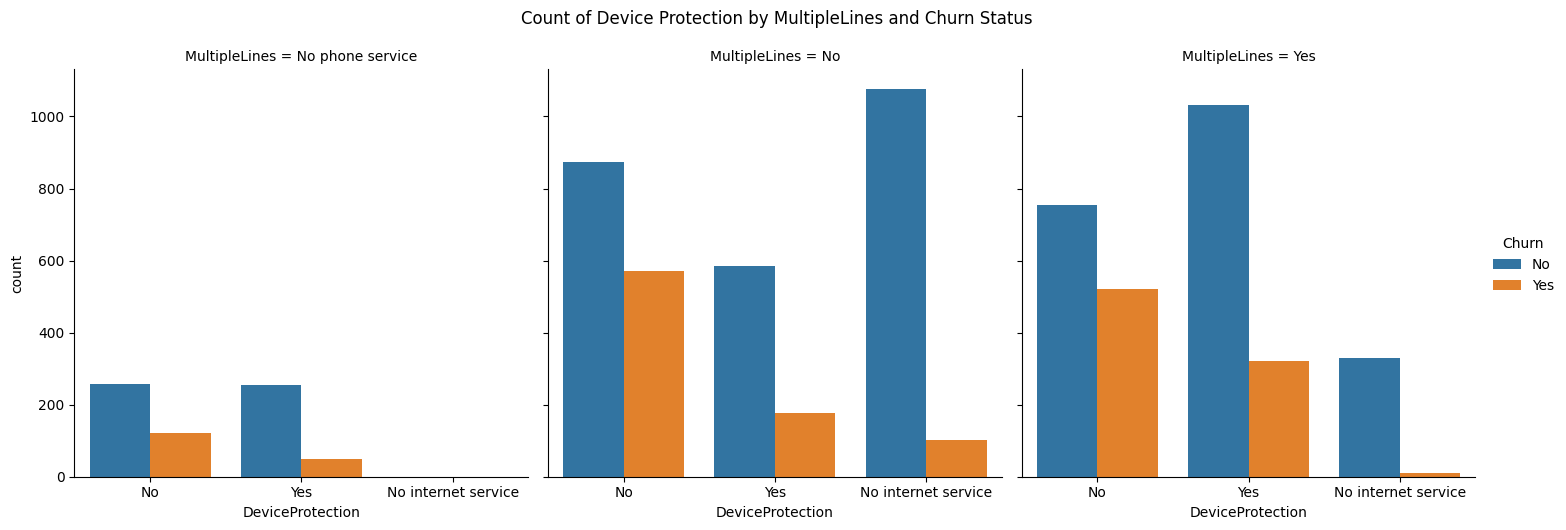

In [37]:
g = sns.catplot(data=df, x="DeviceProtection", hue="Churn", col="MultipleLines", kind="count")

g.fig.suptitle('Count of Device Protection by MultipleLines and Churn Status', y=1.05)

plt.show()

# Model Building

#### STEP - 1 : IDENTIFYING INPUT AND TARGET VARIABLES`

In [38]:
y = df.pop("Churn")
X = df

#### STEP - 2 : SPLITING THE DATA INTO TRAIN AND TEST

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5274, 19) (5274,)
(1758, 19) (1758,)


#### STEP - 3 : DATA PREPARATION FOR X_TRAIN

In [40]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [41]:
X_train_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3540,Female,0,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
3504,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
6715,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
2866,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check
6609,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check


In [42]:
X_train_num.head()

,tenure,MonthlyCharges,TotalCharges
3540,72,108.65,7726.35
3504,68,19.95,1377.70
6715,11,89.20,990.30
2866,12,84.60,1017.35
6609,1,20.10,20.10


In [43]:
encoder_ = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)
X_train_cat_tansformed.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6715,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2866,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6609,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [44]:
scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
3540,1.628149,1.460662,2.416469
3504,1.464856,-1.495682,-0.392705
6715,-0.862073,0.812400,-0.564123
2866,-0.821250,0.659083,-0.552154
6609,-1.270306,-1.490683,-0.993420


In [45]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)

X_train_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,1.628149,1.460662,2.416469,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,1.464856,-1.495682,-0.392705,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6715,-0.862073,0.812400,-0.564123,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2866,-0.821250,0.659083,-0.552154,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6609,-1.270306,-1.490683,-0.993420,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### STEP - 4 : DATA PREPARATION FOR X_TEST 

In [46]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [47]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
5561,-1.270306,-1.472352,-0.993177
5814,-0.657957,-1.474018,-0.856184
2645,-1.270306,-1.500682,-0.993553
3983,-1.270306,-1.352365,-0.991584
6438,-1.270306,0.319120,-0.969394


In [48]:
X_test_cat_tansformed = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)
X_test_cat_tansformed.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5814,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2645,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3983,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6438,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [49]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)

X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,-1.270306,-1.472352,-0.993177,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5814,-0.657957,-1.474018,-0.856184,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2645,-1.270306,-1.500682,-0.993553,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3983,-1.270306,-1.352365,-0.991584,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6438,-1.270306,0.319120,-0.969394,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#### HYPERPRAMETER TUNING THROUGH GRIDSEARCH CV

#### USING LOGISTIC REGRESSION

In [35]:
tuned_parameters = [{'penalty': ['l1', 'l2','l1+l2']}]

clf = GridSearchCV(
    estimator=LogisticRegression(max_iter=5000), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\banav\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\banav\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\banav\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\banav\anaconda\Lib\site-packages\sklearn\linear_model\_logisti

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid=[{'penalty': ['l1', 'l2', 'l1+l2']}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [36]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

lg_pred = clf.best_estimator_.predict(X_test_transformed)
lg_model = clf.score(X_test_transformed, y_test)

print('Score on Test Data: ', lg_model)

Best parameters set found on train set
{'penalty': 'l2'}
LogisticRegression(max_iter=5000)

Score on Test Data:  0.8122866894197952


In [37]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Logistic Regression Predictions'] = lg_pred

output_df

,Actual,Logistic Regression Predictions
5561,No,No
5814,No,No
2645,No,No
3983,Yes,Yes
6438,Yes,Yes
...,...,...
2063,No,No
450,No,No
2116,Yes,Yes
6397,No,No


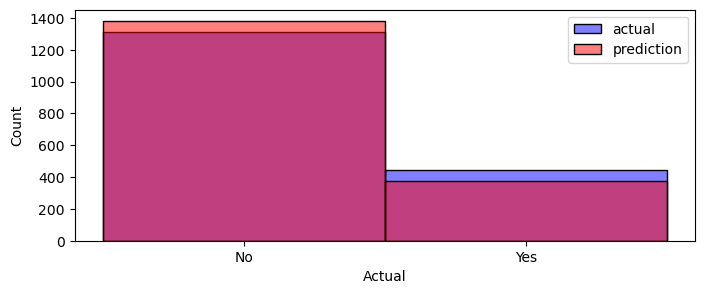

In [38]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Logistic Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

#### Using Decsion Tree

In [40]:
tuned_parameters = [{'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}]

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'min_samples_split': [2, 5, 10]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [41]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

dt_pred = clf.best_estimator_.predict(X_test_transformed)
dt_model = clf.score(X_test_transformed, y_test)

print('Score on Test Data: ', dt_model)

Best parameters set found on train set
{'max_depth': 5, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=5, min_samples_split=10)

Score on Test Data: 


In [42]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Desicion Tree Predictions'] = dt_pred

output_df

,Actual,Desicion Tree Predictions
5561,No,No
5814,No,No
2645,No,No
3983,Yes,Yes
6438,Yes,Yes
...,...,...
2063,No,No
450,No,No
2116,Yes,Yes
6397,No,No


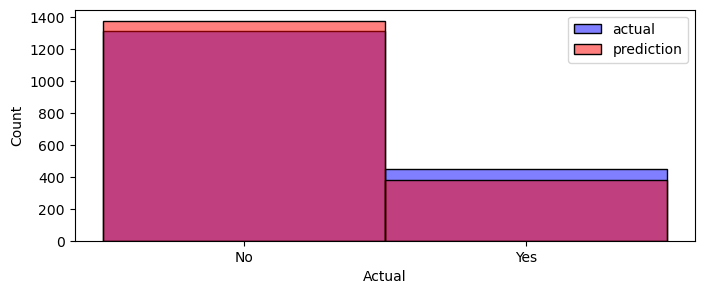

In [43]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Desicion Tree Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

#### Using Randomforest

In [45]:
tuned_parameters = [{'n_estimators': [50, 100, 200], 'max_depth': [5, 10]}]

clf = GridSearchCV(
    estimator=RandomForestClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [46]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

rf_pred = clf.best_estimator_.predict(X_test_transformed)
rf_model = clf.score(X_test_transformed, y_test)

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 10, 'n_estimators': 100}
RandomForestClassifier(max_depth=10)

Score on Test Data:  0.8054607508532423


In [47]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Random Forest Predictions'] = rf_pred

output_df

,Actual,Random Forest Predictions
5561,No,No
5814,No,No
2645,No,No
3983,Yes,Yes
6438,Yes,Yes
...,...,...
2063,No,No
450,No,No
2116,Yes,Yes
6397,No,No


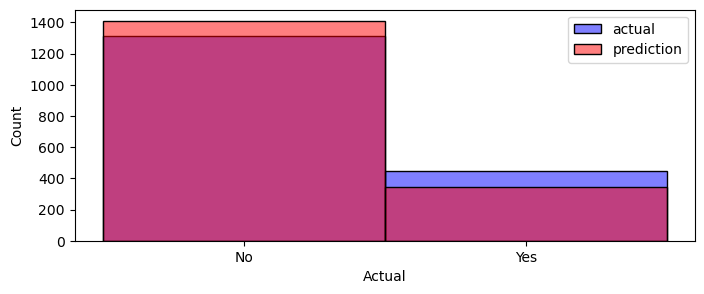

In [48]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Random Forest Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

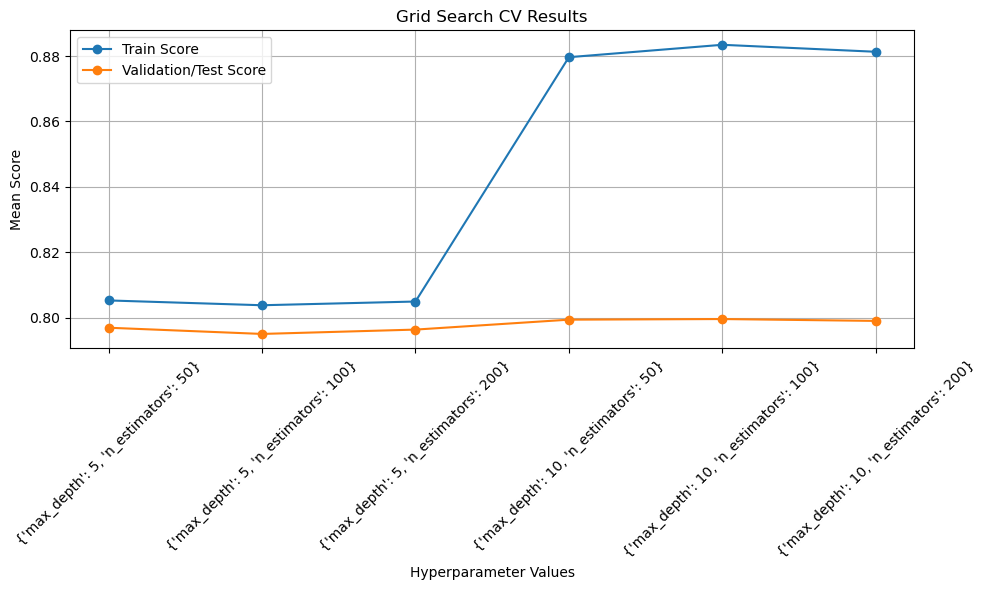

In [62]:
import matplotlib.pyplot as plt
param_values = [str(params) for params in clf.cv_results_['params']]
plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores, label='Train Score', marker='o')
plt.plot(param_values, val_scores, label='Validation/Test Score', marker='o')
plt.title('Grid Search CV Results')
plt.xlabel('Hyperparameter Values')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### COMPARISON OF MODELS

In [49]:
model_names = ['KNN', 'LOGISTC REGRESSION', 'DESCISION TREE', 'RANDOM FOREST']
accuracy_scores = [knn_model, lg_model, dt_model, rf_model]

In [50]:
data = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

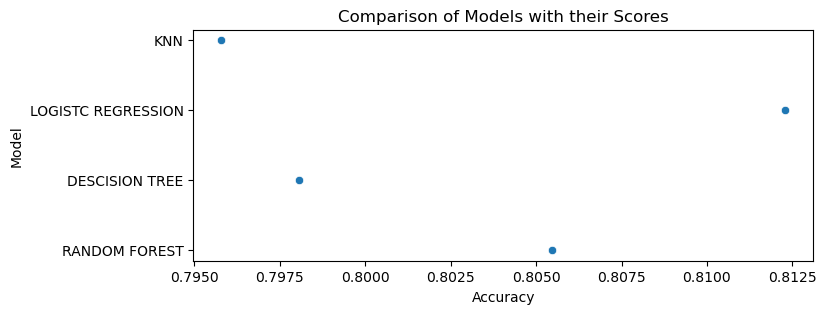

In [60]:
fig, ax = plt.subplots(figsize=(8,3))

sns.scatterplot(x='Accuracy', y='Model', data=data)
plt.title('Comparison of Models with their Scores')

plt.show()